In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check how many null values are in each column
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Check how many "-" values are in each column
insurance[insurance.isin(["-"])].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Check how many positive and negative infinity are in each column
insurance[insurance.isin([np.inf, -np.inf])].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Drop all NAN values and preview the first five rows
insurance.dropna().head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Check the count of each age that are male and female. This allows us to confirm whether or not there are any 
# inconsistent/incorrect age values such as negative age values
pd.crosstab(insurance.sex, insurance.age)

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
sex,,,,,,,,,,,,,,,,,,,,,
female,33,33,14,13,13,14,14,13,13,14,...,13,13,13,13,13,11,12,12,12,11
male,36,35,15,15,15,14,14,15,15,14,...,13,13,13,12,12,12,11,11,11,11


In [8]:
# Round all values in the charges column to two decimals
decimals = 2    
insurance['charges'] = insurance['charges'].apply(lambda x: round(x, decimals))
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


In [9]:
# Use Pandas get_dummies to convert categorical data
insurance = pd.get_dummies(insurance)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [10]:
# Assign X (data) and y (target)
X = insurance[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 11) (1338, 1)


## Assumptions of Linear Regression

In [11]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[   256.85634915    339.19347078    475.50057056     65.65706188
     -65.65706188 -11924.26728936  11924.26728936    587.00932983
     234.04514287   -448.01283443   -373.04163827]]
y-axis intercept:  [-666.93811677]


### The regression model should be linear in parameters

$Y = -666.93811677 + 256.85634915 X_{1} + 339.19347078 X_{2} + 475.50057056 X_{3} + 65.65706188 X_{4} - 65.65706188  X_{5} - 11924.26728936 X_{6} + 11924.26728936 X_{7} + 587.00932983 X_{8} + 234.04514287 X_{9} - 448.01283443 X_{11} - 373.04163827 X_{12}$

### regression model: age and charges

In [14]:
# Assign the data to X and y
X = insurance[['age']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 1) (1338, 1)


In [15]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

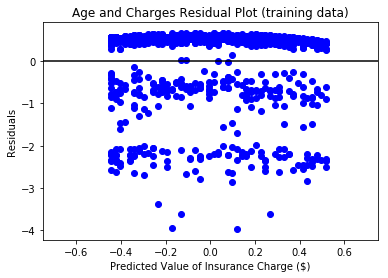

In [19]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Age and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

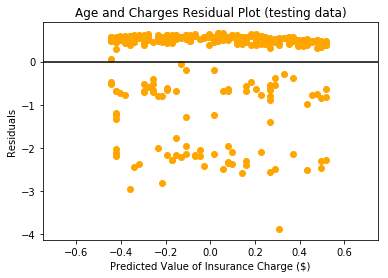

In [20]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Age and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [21]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9373034425206593, R2: 0.09872954448876725


### regression model: bmi and charges

In [22]:
# Assign the data to X and y
X = insurance[['bmi']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 1) (1338, 1)


In [23]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [25]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [26]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

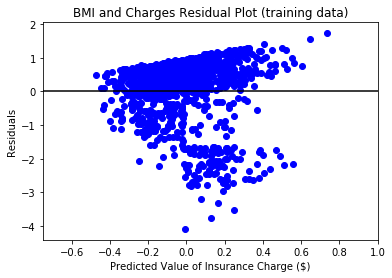

In [28]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 1)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("BMI and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

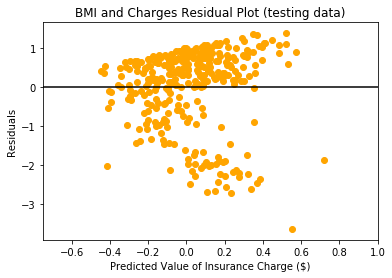

In [29]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 1)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("BMI and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [30]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9961949710405227, R2: 0.042101997499169985


### regression model: children and charges

In [31]:
# Assign the data to X and y
X = insurance[['children']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 1) (1338, 1)


In [32]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [35]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

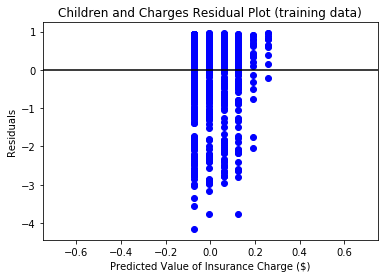

In [36]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Children and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

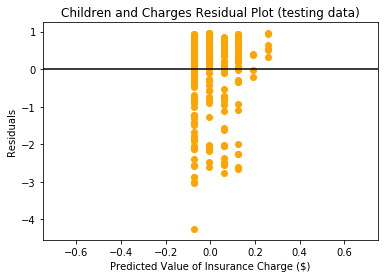

In [37]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Children and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [38]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0409412932854538, R2: -0.0009241308629399648


### regression model: sex and charges

In [39]:
# Assign the data to X and y
X = insurance[['sex_female', 'sex_male']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 2) (1338, 1)


In [40]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [42]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [43]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

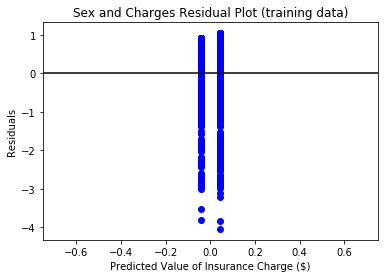

In [44]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Sex and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

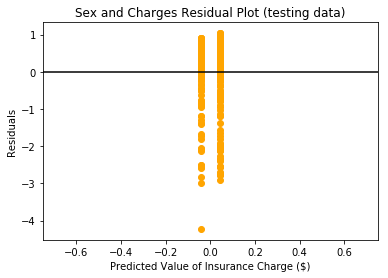

In [45]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Sex and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [46]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0331751027131897, R2: 0.0065435021330810805


### regression model: smoking and charges

In [47]:
# Assign the data to X and y
X = insurance[['smoker_no', 'smoker_yes']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 2) (1338, 1)


In [48]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [50]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

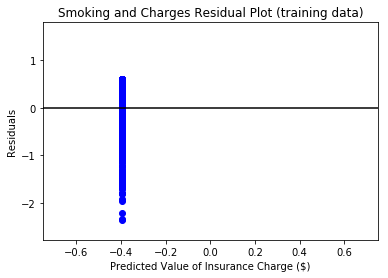

In [51]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Smoking and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

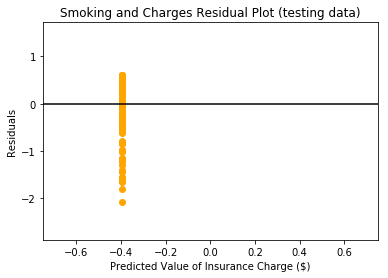

In [52]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Smoking and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [53]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.371083957592372, R2: 0.6431817143520024


### regression model: region and charges

In [54]:
# Assign the data to X and y
X = insurance[['region_northeast', 'region_northwest']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 2) (1338, 1)


In [55]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [57]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

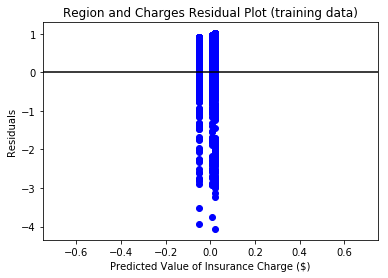

In [58]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Region and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

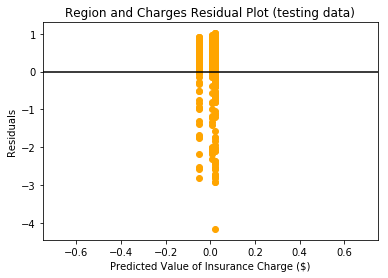

In [59]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Region and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [60]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0365582930197632, R2: 0.0032903726444208914


In [61]:
# Assign the data to X and y
X = insurance[['region_southeast', 'region_southwest']]
y = insurance['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 2) (1338, 1)


In [62]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [64]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

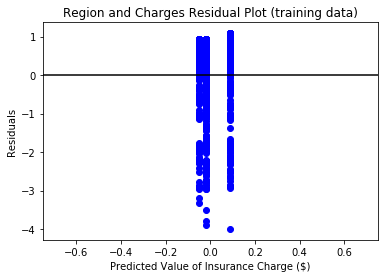

In [65]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Region and Charges Residual Plot (training data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

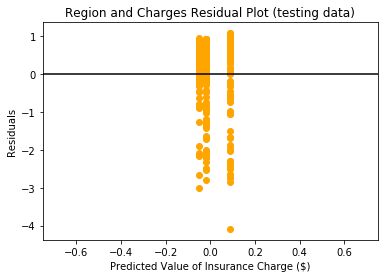

In [66]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange")
plt.xlim(-0.75, 0.75)
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Region and Charges Residual Plot (testing data)")
plt.xlabel("Predicted Value of Insurance Charge ($)")
plt.ylabel("Residuals")
plt.show()

In [67]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0271922855775908, R2: 0.012296320356537827


### Conclusion
Since the points in residual plots are not randomly dispersed around the horizontal axis, a linear relationship does not exist between health insurance costs and age, sex, BMI, children, smoking, region.
